__Import the libraries__

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk import word_tokenize

__Read the file as a pandas data-frame__

In [2]:
op = pd.read_csv('Eopinions.csv')
op.head()

,class,text
0,Auto,I have recently purchased a J30T with moderat...
1,Camera,I bought this product because I need instant ...
2,Auto,I have owned my Buick since 53000 km and I am...
3,Camera,This was my first Digital camera so I did qui...
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...


__Perform Label Encoding on ‘class’ column__

In [3]:
def Label_encoding(DataFrame):
    import pandas as pd
    import numpy as np
    df = pd.read_csv(DataFrame)
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(df['class'])
    df['Label'] = le.fit_transform(df['class'])
    return df

In [4]:
Label_encoding('Eopinions.csv')

,class,text,Label
0,Auto,I have recently purchased a J30T with moderat...,0
1,Camera,I bought this product because I need instant ...,1
2,Auto,I have owned my Buick since 53000 km and I am...,0
3,Camera,This was my first Digital camera so I did qui...,1
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...,1
...,...,...,...
595,Auto,Recently our 12 year old Nissan Stanza decide...,0
596,Camera,I always do a lot of research before I buy an...,1
597,Auto,This car is an all around good buy If you ar...,0
598,Auto,I waited to write this until I have had 4 mon...,0


In [5]:
op = Label_encoding('Eopinions.csv')
op.head()

,class,text,Label
0,Auto,I have recently purchased a J30T with moderat...,0
1,Camera,I bought this product because I need instant ...,1
2,Auto,I have owned my Buick since 53000 km and I am...,0
3,Camera,This was my first Digital camera so I did qui...,1
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...,1


<AxesSubplot:>

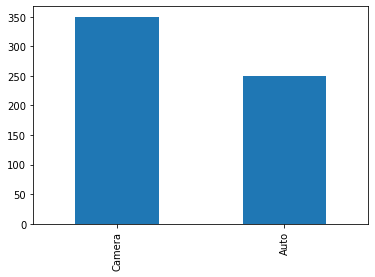

In [6]:
#Plot a bar graph to compare the frequencies of both the classes
import matplotlib.pyplot as plt
import seaborn as sns
op['class'].value_counts().plot(kind = 'bar')

__Preprocess the ‘text’ column__

In [7]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import  wordnet
from nltk.stem import WordNetLemmatizer

#Tokenize Function
def Tokenize(string):
    tokens=nltk.tokenize.word_tokenize(string)
    return " ".join(tokens)

#RemoveStopWordsFunction
def RemoveStopWords(string):
    #Removing Punctuations
    for each in punctuation:
        string=string.replace(each,"")
    
    #Removing Stopwords
    english_stopwords=stopwords.words('english')
    stopwords_removed_tokens=[]
    words=string.split(" ")
    
    for each in words:
        if each not in english_stopwords:
            stopwords_removed_tokens.append(each)
    return " ".join(stopwords_removed_tokens) 


#LemmatizeFunction
def Lemmatize(string):
    word_lem=WordNetLemmatizer()
    words=string.split() 
    lemmatizeWords=[]
    for each in words:
        lemmatizeWords.append(word_lem.lemmatize(each))
    return " ".join(lemmatizeWords)

def Refine(string):
    return Lemmatize(RemoveStopWords(Tokenize(string)))



In [8]:
op['preprocessed'] = op['text'].apply(Refine)
op.head()

,class,text,Label,preprocessed
0,Auto,I have recently purchased a J30T with moderat...,0,I recently purchased J30T moderate mile I shop...
1,Camera,I bought this product because I need instant ...,1,I bought product I need instant gratification ...
2,Auto,I have owned my Buick since 53000 km and I am...,0,I owned Buick since 53000 km I approaching 600...
3,Camera,This was my first Digital camera so I did qui...,1,This first Digital camera I quite bit research...
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...,1,Minolta DiMAGE 7Hi digital SLR 5 megapixel 2 3...


__Vectorize the text using CountVectorizer__

In [9]:
def CountVectorization(S):
    from nltk import word_tokenize
    S_tokens = word_tokenize(S)
   
    S_corpus = set(S_tokens)
    S_corpus_dict = dict.fromkeys(S_corpus,0)
    S_dict = dict.fromkeys(S_corpus_dict,0)
    for token in S_tokens:
        S_dict[token]+=1
        S_list = list(S_dict.values())
    return (S_list)

In [10]:
op['vectorized_column'] = op['preprocessed'].apply(CountVectorization)
op.head()

,class,text,Label,preprocessed,vectorized_column
0,Auto,I have recently purchased a J30T with moderat...,0,I recently purchased J30T moderate mile I shop...,"[1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 2, ..."
1,Camera,I bought this product because I need instant ...,1,I bought product I need instant gratification ...,"[1, 1, 1, 3, 2, 3, 1, 6, 2, 1, 2, 7, 2, 6, 1, ..."
2,Auto,I have owned my Buick since 53000 km and I am...,0,I owned Buick since 53000 km I approaching 600...,"[2, 1, 1, 1, 1, 1, 1, 1, 2, 17, 1, 1, 1, 1, 1,..."
3,Camera,This was my first Digital camera so I did qui...,1,This first Digital camera I quite bit research...,"[1, 1, 1, 1, 4, 1, 2, 14, 1, 1, 1, 1, 1, 1, 1,..."
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...,1,Minolta DiMAGE 7Hi digital SLR 5 megapixel 2 3...,"[1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, ..."


__Split the dataset into 2 parts namely “train.csv” and “test.csv” having 80% and 20% of the data respectively from the originaldata. These are your Train and Test Data. Make sure train and test data are having same proportion of data points as the original data__

In [11]:
op.to_csv('op_new.csv')

In [12]:
def split(DataFrame):
    import pandas as pd
    import numpy as np
    df = pd.read_csv(DataFrame)
    df['split'] = np.random.randn(df.shape[0], 1)
    msk = np.random.rand(len(df)) <= 0.8
    train = df[msk]
    test = df[~msk]
    return (train.to_csv('train.csv',index = False),test.to_csv('test.csv',index = False))

In [13]:
split('op_new.csv')

(None, None)

In [14]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [15]:
print(len(train))
print(len(test))

486
114


In [16]:
train.drop('Unnamed: 0',1)

,class,text,Label,preprocessed,vectorized_column,split
0,Auto,I have owned my Buick since 53000 km and I am...,0,I owned Buick since 53000 km I approaching 600...,"[2, 1, 1, 1, 1, 1, 1, 1, 2, 17, 1, 1, 1, 1, 1,...",0.311134
1,Camera,This was my first Digital camera so I did qui...,1,This first Digital camera I quite bit research...,"[1, 1, 1, 1, 4, 1, 2, 14, 1, 1, 1, 1, 1, 1, 1,...",0.499624
2,Auto,I had a 1984 Saab a 1996 Saab and now a 1999...,0,I 1984 Saab 1996 Saab 1999 S3 One thing I like...,"[1, 2, 1, 7, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, ...",-0.731917
3,Auto,Nissan has needed a redesign of the Sentra si...,0,Nissan needed redesign Sentra since 1997 model...,"[1, 1, 1, 2, 1, 18, 1, 1, 1, 2, 1, 1, 1, 1, 1,...",-1.191199
4,Camera,The 3040 represents a new advance in digital ...,1,The 3040 represents new advance digital camera...,"[3, 2, 1, 1, 1, 1, 1, 1, 3, 4, 2, 1, 1, 1, 1, ...",-0.165865
...,...,...,...,...,...,...
481,Camera,When I first started looking a digital camera...,1,When I first started looking digital camera I ...,"[2, 2, 1, 2, 2, 1, 1, 1, 3, 1, 2, 3, 1, 1, 9, ...",0.498056
482,Camera,I ve been wanting to get a digital camera for...,1,I wanting get digital camera convenient I usin...,"[1, 1, 2, 1, 2, 3, 14, 1, 1, 1, 1, 1, 3, 1, 1,...",1.482860
483,Auto,This car is an all around good buy If you ar...,0,This car around good buy If car really get lot...,"[1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 2, 4, 1, 1, ...",-0.434823
484,Auto,I waited to write this until I have had 4 mon...,0,I waited write I 4 month driving 2000 KIA Spor...,"[1, 1, 1, 1, 1, 2, 1, 2, 1, 8, 1, 1, 1, 1, 2, ...",-0.294596


In [17]:
test.drop('Unnamed: 0',1)

,class,text,Label,preprocessed,vectorized_column,split
0,Auto,I have recently purchased a J30T with moderat...,0,I recently purchased J30T moderate mile I shop...,"[1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 2, ...",-0.967653
1,Camera,I bought this product because I need instant ...,1,I bought product I need instant gratification ...,"[1, 1, 1, 3, 2, 3, 1, 6, 2, 1, 2, 7, 2, 6, 1, ...",-0.053892
2,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...,1,Minolta DiMAGE 7Hi digital SLR 5 megapixel 2 3...,"[1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, ...",1.401600
3,Camera,From Olympus to Kodak b I enjoyed using a...,1,From Olympus Kodak b I enjoyed using Olympus d...,"[1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, ...",0.990726
4,Auto,General Trooper Information b The Isuzu T...,0,General Trooper Information b The Isuzu Troope...,"[1, 2, 2, 1, 1, 12, 1, 1, 2, 5, 1, 1, 1, 4, 3,...",1.460160
...,...,...,...,...,...,...
109,Auto,Picture this You re in your new black 2000 ci...,0,Picture You new black 2000 civic ex moonroof f...,"[1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, ...",0.799825
110,Auto,The Beach Boys really knew what they were tal...,0,The Beach Boys really knew talking singing sai...,"[1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 11, 2, 1, 1,...",0.752036
111,Auto,I bought a Corolla in 1995 It was my first c...,0,I bought Corolla 1995 It first car still car M...,"[1, 1, 4, 1, 2, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.248560
112,Auto,Recently our 12 year old Nissan Stanza decide...,0,Recently 12 year old Nissan Stanza decided tim...,"[1, 5, 1, 1, 2, 1, 1, 1, 1, 7, 1, 1, 1, 1, 2, ...",0.026668


__Train your machine learning algorithm for classificationand prepare a model(you can choose anyappropriate algorithmof your choice)__

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [19]:
x_train = vectorizer.fit_transform(train['preprocessed'])
y_train = train['Label']

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [21]:
x_test = vectorizer.transform(test['preprocessed'])
y_test = test['Label']

In [22]:
y_pred=nb.predict(x_test)

In [23]:
def Getclass(val):
    if val==0:
        return 'Auto'
    else:
        return 'Camera'

result = test.loc[:,['text','class']]
result['predicted class'] = list(map(lambda x: Getclass(x),y_pred))
result.head()

,text,class,predicted class
0,I have recently purchased a J30T with moderat...,Auto,Auto
1,I bought this product because I need instant ...,Camera,Camera
2,Minolta DiMAGE 7Hi is in a digital SLR with 5...,Camera,Camera
3,From Olympus to Kodak b I enjoyed using a...,Camera,Camera
4,General Trooper Information b The Isuzu T...,Auto,Auto


In [24]:
def values(x):
    if x == 'Auto':
        return 0
    else:
        return 1
    
        
result['ActualValues'] = list(map(lambda x: values(x),result['class']))
result['PredictedValues'] = list(map(lambda x: values(x),result['predicted class']))
result.head()

,text,class,predicted class,ActualValues,PredictedValues
0,I have recently purchased a J30T with moderat...,Auto,Auto,0,0
1,I bought this product because I need instant ...,Camera,Camera,1,1
2,Minolta DiMAGE 7Hi is in a digital SLR with 5...,Camera,Camera,1,1
3,From Olympus to Kodak b I enjoyed using a...,Camera,Camera,1,1
4,General Trooper Information b The Isuzu T...,Auto,Auto,0,0


__Now test the model on the Test data and evaluatethe Performance by providing Confusion Matrix for yourmodel__

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(result['class'],result['predicted class'],labels = ['Auto','Camera'])

array([[44,  0],
       [ 0, 70]])

__Plot ROC Curve__

In [26]:
def metric(df):
    import matplotlib.pyplot as plt 
    from sklearn.metrics import roc_curve
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_auc_score
    tn, fp, fn, tp =  confusion_matrix(df['ActualValues'],df['PredictedValues']).ravel()
    fp, tp, thresholds = roc_curve(df['ActualValues'],df['PredictedValues'])
    plt.plot(fp, tp)
    return(tn, fp, fn, tp)

(44, array([0., 0., 1.]), 0, array([0., 1., 1.]))

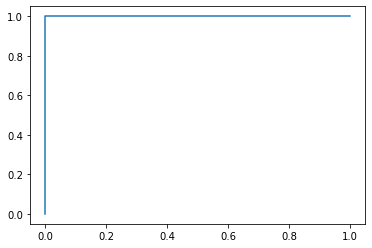

In [28]:
metric(result)